In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import copy
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve


#Подгрузка данных осуществляется из гитахаба, забрасывать в colab excel таблицу не нужно

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Dekem1/Intern_tasks/main/"

data = pd.read_excel(DATA_URL + "data_obr.xlsx")

In [3]:
data

,al_ContractNumber,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,...,res_payout_tot_delay15,res_payout_tot_delay30,res_payout_tot_delay45,res_payout_tot_delay60,res_payout_tot_delay90,fl_cnt,fl_cnt_during_3M,fl_cnt_during_12M,fl_requests_cnt_12M,is_test
0,882-001-17,3000,1,30,1,0,0,0,2,1,...,1000.0,4590.4,4590.4,4590.4,4590.4,1,1,1,1,0
1,1776-001-17,5000,1,55,1,0,1,0,2,1,...,6500.0,6500.0,6500.0,6500.0,6500.0,1,1,1,1,0
2,2234-001-17,5000,1,32,1,0,1,0,3,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,2649-001-17,5000,1,77,2,1,1,0,3,0,...,8000.0,8000.0,8000.0,8000.0,8000.0,2,1,2,3,0
4,2320-001-17,3000,1,77,2,1,1,0,3,0,...,3960.0,3960.0,3960.0,3960.0,3960.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,80519-128-17,4000,3,77,2,1,0,0,3,1,...,5040.0,5040.0,5040.0,5040.0,5040.0,3,2,2,3,1
9982,82024-128-17,3000,4,77,1,1,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
9983,82115-128-17,3000,4,77,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,8940.0,1,0,1,2,1
9984,84064-128-17,5000,4,59,1,0,1,0,2,0,...,0.0,8800.0,8800.0,8800.0,8800.0,5,2,4,5,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   al_ContractNumber             9986 non-null   object 
 1   al_amount                     9986 non-null   int64  
 2   al_issue_M                    9986 non-null   int64  
 3   psp_issue_rgn                 9986 non-null   int64  
 4   sex                           9986 non-null   int64  
 5   is_client_local               9986 non-null   int64  
 6   has_snils                     9986 non-null   int64  
 7   zaim_cards                    9986 non-null   int64  
 8   age                           9986 non-null   int64  
 9   responsecode                  9986 non-null   int64  
 10  was_garant                    9986 non-null   int64  
 11  is_pboul                      9986 non-null   int64  
 12  has_foreign_currency_credits  9986 non-null   int64  
 13  cou

In [5]:
unique, counts = np.unique(data['al_ContractNumber'], return_counts=True)
dict(zip(unique, counts))

{'100034-014-17': 1,
 '100063-123-17': 1,
 '100067-011-17': 1,
 '100091-123-17': 1,
 '100094-070-17': 1,
 '100116-020-17': 1,
 '100145-002-17': 1,
 '100161-019-17': 1,
 '100197-023-17': 1,
 '100214-045-17': 1,
 '100263-006-17': 1,
 '100268-116-17': 1,
 '100304-005-17': 1,
 '100329-005-17': 1,
 '10034-026-17': 1,
 '10036-005-17': 1,
 '100403-116-17': 1,
 '100409-118-17': 1,
 '100432-118-17': 1,
 '100440-092-17': 1,
 '100452-110-17': 1,
 '100461-118-17': 1,
 '100470-019-17': 1,
 '100488-016-17': 1,
 '10053-013-17': 1,
 '10055-008-17': 1,
 '100566-012-17': 1,
 '100609-026-17': 1,
 '100634-029-17': 1,
 '10064-002-17': 1,
 '100662-040-17': 1,
 '100686-118-17': 1,
 '100706-123-17': 1,
 '100771-118-17': 1,
 '100778-006-17': 1,
 '1008-012-17': 1,
 '100834-110-17': 1,
 '100857-023-17': 1,
 '10086-006-17': 1,
 '100895-110-17': 1,
 '100907-006-17': 1,
 '100944-005-17': 1,
 '100959-092-17': 1,
 '100968-025-17': 1,
 '100972-025-17': 1,
 '101015-010-17': 1,
 '101040-025-17': 1,
 '101062-013-17': 1,


Уберем все данные мегафона


In [6]:
data_bez_mega=data.drop(columns=['al_LIFETIME_BIN', 'al_BLOCK_DUR', 'al_CIRCLE', 'al_ALL_CLC','al_PAY_MAX','al_SCORE2'])
data_bez_mega=data_bez_mega[data_bez_mega["responsecode"] < 98]

In [7]:
X_train = data_bez_mega[data_bez_mega["is_test"] == 0]
X_test = data_bez_mega[data_bez_mega["is_test"] == 1]



X_train=X_train.drop(columns=['al_ContractNumber','res_npl_90','res_payout_principal_inTime','res_payout_principal_delay15','res_payout_principal_delay30','res_payout_principal_delay45', \
                          'res_payout_principal_delay60','res_payout_principal_delay90','res_payout_tot_inTime','res_payout_tot_delay15','res_payout_tot_delay30','res_payout_tot_delay45','res_payout_tot_delay60','res_payout_tot_delay90',\
                          'fl_cnt','fl_cnt_during_3M','fl_cnt_during_12M','fl_requests_cnt_12M' ])    
X_test=X_test.drop(columns=['al_ContractNumber','res_npl_90','res_payout_principal_inTime','res_payout_principal_delay15','res_payout_principal_delay30','res_payout_principal_delay45', \
                          'res_payout_principal_delay60','res_payout_principal_delay90','res_payout_tot_inTime','res_payout_tot_delay15','res_payout_tot_delay30','res_payout_tot_delay45','res_payout_tot_delay60','res_payout_tot_delay90',\
                          'fl_cnt','fl_cnt_during_3M','fl_cnt_during_12M','fl_requests_cnt_12M' ])



In [8]:
X_train.describe()

,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,was_garant,...,avg_payout_period_pdl,avg_pdl_full_cost,avg_pdl_amount,pdl_delay5_avg,pdl_delay30_avg,pdl_delay60_avg,pdl_delay90_avg,pdl_delay_more_avg,res_npl_15,is_test
count,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,...,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.0
mean,4285.591767,5.394797,59.061607,1.271870,0.449257,0.176387,0.001286,2.145226,0.571469,0.003145,...,0.944826,1.038593,1687.478818,0.007004,0.024014,0.009434,0.014008,0.026587,0.453831,0.0
std,938.980912,3.514446,23.690307,0.444955,0.497454,0.381176,0.035847,0.792067,0.506041,0.097085,...,0.228337,0.192638,7128.915715,0.083402,0.153103,0.096676,0.117532,0.383926,0.497899,0.0
min,3000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3000.000000,3.000000,46.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5000.000000,5.000000,77.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5000.000000,8.000000,77.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,5000.000000,12.000000,92.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,...,1.000000,2.000000,250000.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,0.0


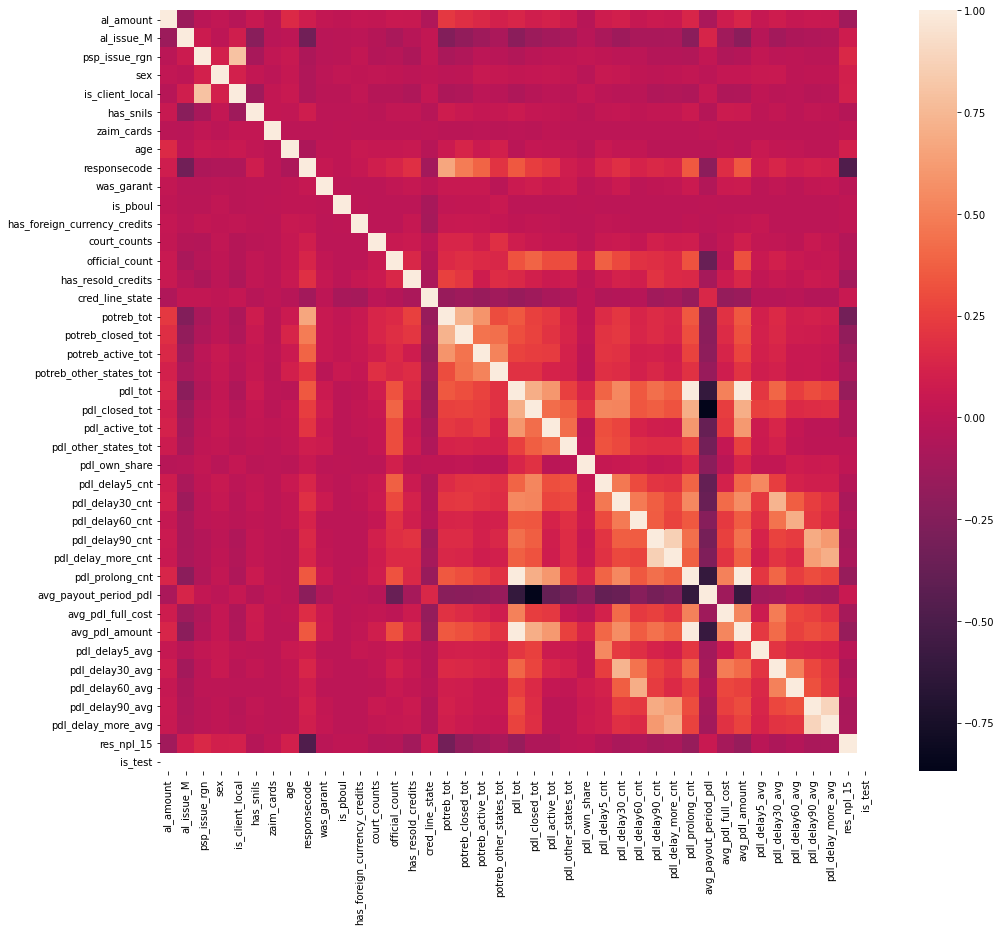

In [9]:
plt.figure(figsize=(16,14))
sns.heatmap(X_train.corr(method='spearman'));

#Смотри на корреляцию с res_npl_15

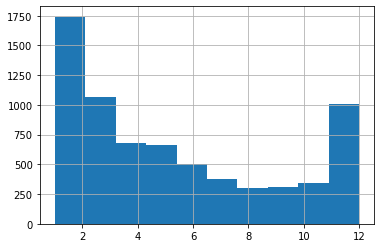

In [10]:
X_train['al_issue_M'].hist();

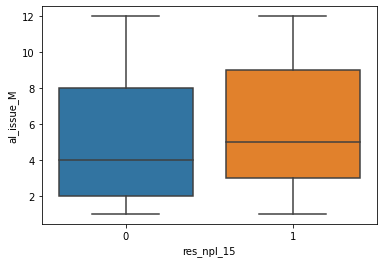

In [11]:
sns.boxplot(x='res_npl_15',y='al_issue_M',data=X_train)

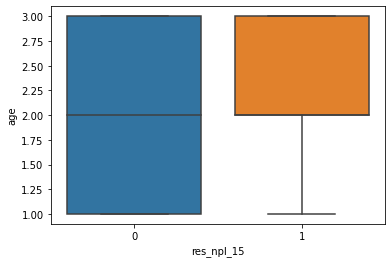

In [12]:
sns.boxplot(x='res_npl_15',y='age',data=X_train)

#Почти все из тех кто вернул займ до 15 дней являются людьми из 2/3 возрастной группы т.е 25+ лет***





In [13]:
X_train.loc[(X_train.al_issue_M < 6), 'al_issue_M'] = 1
X_train.loc[(X_train.al_issue_M == 6), 'al_issue_M'] = 2
X_train.loc[(X_train.al_issue_M == 7), 'al_issue_M'] = 2
X_train.loc[(X_train.al_issue_M == 8), 'al_issue_M'] = 2
X_train.loc[(X_train.al_issue_M == 9), 'al_issue_M'] = 2
X_train.loc[(X_train.al_issue_M == 10), 'al_issue_M'] = 2
X_train.loc[(X_train.al_issue_M > 10), 'al_issue_M'] = 3


In [14]:
X_train['al_issue_M'].unique()

array([1, 2, 3])

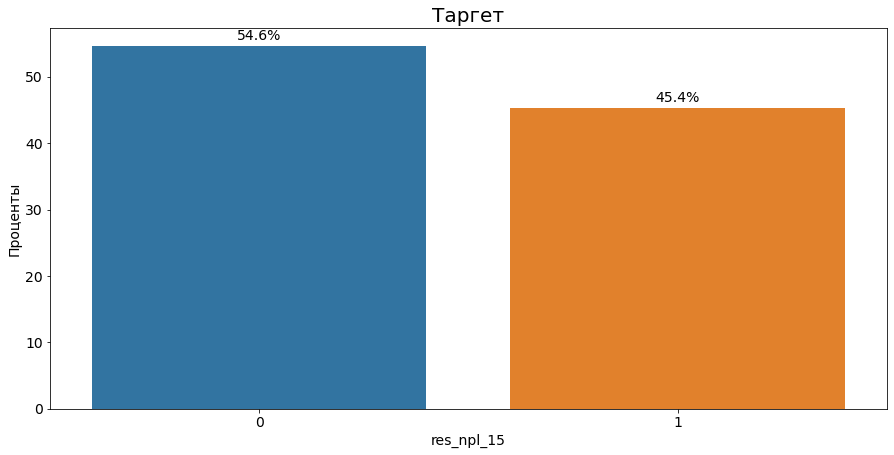

In [15]:
# нормирование на размер датасета
norm_target = (X_train
               .res_npl_15
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Таргет', fontsize=20)

plt.xlabel('res_npl_15', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Сильного дизбаланса нет

In [16]:
print(X_test.shape)
print(X_train.shape)
print(data_bez_mega.shape)

(2989, 41)
(6996, 41)
(9985, 59)


In [17]:
X_train.describe(include='all')

,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,was_garant,...,avg_payout_period_pdl,avg_pdl_full_cost,avg_pdl_amount,pdl_delay5_avg,pdl_delay30_avg,pdl_delay60_avg,pdl_delay90_avg,pdl_delay_more_avg,res_npl_15,is_test
count,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,...,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.0
mean,4285.591767,1.549886,59.061607,1.271870,0.449257,0.176387,0.001286,2.145226,0.571469,0.003145,...,0.944826,1.038593,1687.478818,0.007004,0.024014,0.009434,0.014008,0.026587,0.453831,0.0
std,938.980912,0.731756,23.690307,0.444955,0.497454,0.381176,0.035847,0.792067,0.506041,0.097085,...,0.228337,0.192638,7128.915715,0.083402,0.153103,0.096676,0.117532,0.383926,0.497899,0.0
min,3000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3000.000000,1.000000,46.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5000.000000,1.000000,77.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5000.000000,2.000000,77.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,5000.000000,3.000000,92.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,...,1.000000,2.000000,250000.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,0.0


In [18]:
X_train = X_train.loc[X_train['responsecode'] != 3]

#Убрали выброс, 1 строчка это малая потеря



In [19]:
X_train.columns

Index(['al_amount', 'al_issue_M', 'psp_issue_rgn', 'sex', 'is_client_local',
       'has_snils', 'zaim_cards', 'age', 'responsecode', 'was_garant',
       'is_pboul', 'has_foreign_currency_credits', 'court_counts',
       'official_count', 'has_resold_credits', 'cred_line_state', 'potreb_tot',
       'potreb_closed_tot', 'potreb_active_tot', 'potreb_other_states_tot',
       'pdl_tot', 'pdl_closed_tot', 'pdl_active_tot', 'pdl_other_states_tot',
       'pdl_own_share', 'pdl_delay5_cnt', 'pdl_delay30_cnt', 'pdl_delay60_cnt',
       'pdl_delay90_cnt', 'pdl_delay_more_cnt', 'pdl_prolong_cnt',
       'avg_payout_period_pdl', 'avg_pdl_full_cost', 'avg_pdl_amount',
       'pdl_delay5_avg', 'pdl_delay30_avg', 'pdl_delay60_avg',
       'pdl_delay90_avg', 'pdl_delay_more_avg', 'res_npl_15', 'is_test'],
      dtype='object')

In [20]:
num_cols=['pdl_delay_more_avg','age','pdl_delay_more_cnt','pdl_prolong_cnt','pdl_closed_tot','pdl_active_tot']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

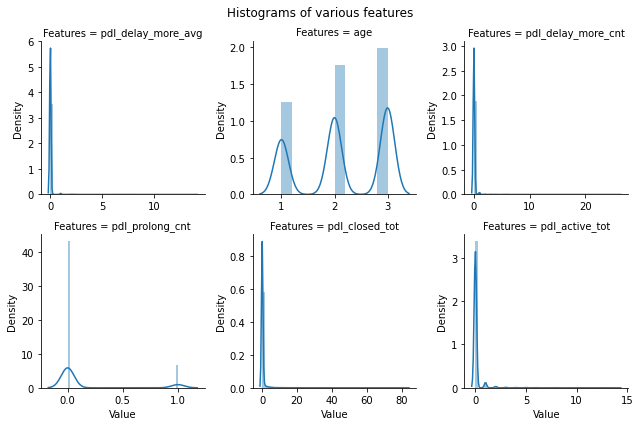

In [21]:
numeric_features = X_train[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

Нормальизуем через логорифм

In [22]:
for i in ['pdl_delay_more_avg', 'pdl_delay_more_cnt', 'pdl_closed_tot', 'pdl_active_tot']:
    X_train[i] = np.log(X_train[i]+1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

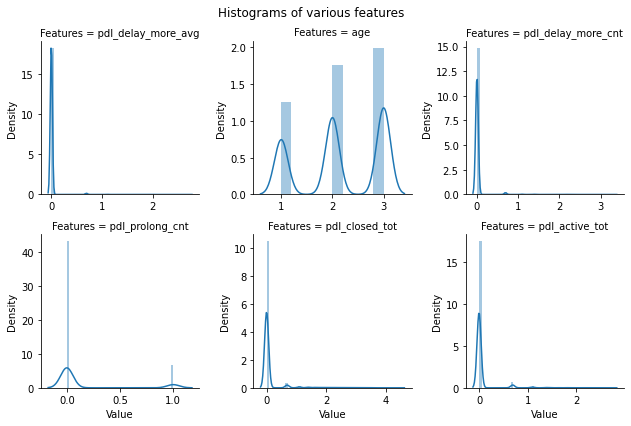

In [23]:
numeric_features = X_train[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

**ожидал большего**

In [24]:
#попробуем добавить фичу "средняя сумма кредита по месяцу" и "средняя сумма кредита в зависимости от возрастной группы"
#И аналогичеое только не средняя сумма кредита, а среднее количество открытых и закрытых займов т.е pdl_closed_tot/pdl_active_tot

#по месяцу
mean_al_amount_month = X_train.groupby('al_issue_M')['al_amount'].median().to_dict()
X_train['mean_amount_per_month'] = X_train['al_issue_M'].map(mean_al_amount_month)
#по возрасту
mean_al_amount_age = X_train.groupby('age')['al_amount'].median().to_dict()
X_train['mean_amount_per_age'] = X_train['age'].map(mean_al_amount_age)




In [25]:
#Тут я вероятно ошибся в логике

'''
#количество открытых займов по месяцу
mean_active_tot_month = X_train.groupby('al_issue_M')['pdl_active_tot'].median().to_dict()
X_train['mean_active_tot_per_month'] = X_train['al_issue_M'].map(mean_active_tot_month)
#количество открытыйх займов по возрасту
mean_active_tot_age = X_train.groupby('age')['pdl_active_tot'].median().to_dict()
X_train['mean_active_tot_per_age'] = X_train['age'].map(mean_active_tot_age)
#количество закрытыйх займов по месяцу
mean_close_tot_month = X_train.groupby('al_issue_M')['pdl_closed_tot'].median().to_dict()
X_train['mean_close_tot_per_month'] = X_train['al_issue_M'].map(mean_close_tot_month)
##количество закрытых займов по возрасту
mean_close_tot_age = X_train.groupby('age')['pdl_close_tot'].median().to_dict()
X_train['mean_close_tot_per_age'] = X_train['age'].map(mean_close_tot_age)
'''

"\n#количество открытых займов по месяцу\nmean_active_tot_month = X_train.groupby('al_issue_M')['pdl_active_tot'].median().to_dict()\nX_train['mean_active_tot_per_month'] = X_train['al_issue_M'].map(mean_active_tot_month)\n#количество открытыйх займов по возрасту\nmean_active_tot_age = X_train.groupby('age')['pdl_active_tot'].median().to_dict()\nX_train['mean_active_tot_per_age'] = X_train['age'].map(mean_active_tot_age)\n#количество закрытыйх займов по месяцу\nmean_close_tot_month = X_train.groupby('al_issue_M')['pdl_closed_tot'].median().to_dict()\nX_train['mean_close_tot_per_month'] = X_train['al_issue_M'].map(mean_close_tot_month)\n##количество закрытых займов по возрасту\nmean_close_tot_age = X_train.groupby('age')['pdl_close_tot'].median().to_dict()\nX_train['mean_close_tot_per_age'] = X_train['age'].map(mean_close_tot_age)\n"

In [26]:
#по месяцу
mean_al_amount_month = X_test.groupby('al_issue_M')['al_amount'].median().to_dict()
X_test['mean_amount_per_month'] = X_test['al_issue_M'].map(mean_al_amount_month)
#по возрасту
mean_al_amount_age = X_test.groupby('age')['al_amount'].median().to_dict()
X_test['mean_amount_per_age'] = X_test['age'].map(mean_al_amount_age)

#Анализ завершен, убираем таргет колонку и начинаем строить бейзлайн

In [27]:
y_train=X_train['res_npl_15']
y_test=X_test['res_npl_15']
X_train=X_train.drop(columns=['res_npl_15'])
X_test=X_test.drop(columns=['res_npl_15'])

In [28]:
sc= StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

#Baseline

In [29]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7581478868143001
precision: 0.6777777777777778
recall: 0.7261904761904762
f1: 0.7011494252873564
logloss: 9.61412946596631


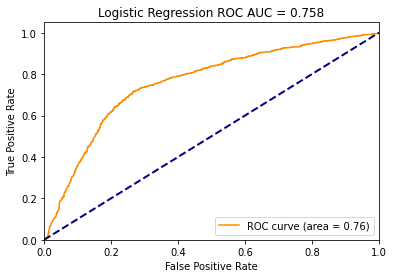

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [33]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [34]:
#ЗАПУСКАТЬ ТОЛЬКО ПЕРЕД ПЕРЕРЫВОМ НА ОБЕД. МОЖНО ЗАСТРЯТЬ НА 10+ МИНУТ, %%time я забыл прописать
# производим обучение по сетке
#grid_cv.fit(X_train, y_train)

In [ ]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

In [36]:
best_params = {'C': 750.25,
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [37]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [38]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.6888580565204806
precision: 0.6901408450704225
recall: 0.328125
f1: 0.4447806354009077
logloss: 12.722432630005969


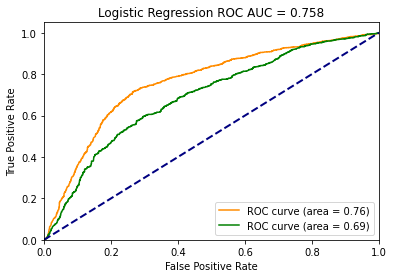

In [39]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

Попробуем иные модели

In [45]:
models = [LinearRegression(), KNeighborsRegressor(),DecisionTreeClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    print(f'model: {str(m)}')
  
    print('roc-auc:', roc_auc_score(y_test, y_pred))
    
    

model: LinearRegression()
roc-auc: 0.6709572658850774
model: KNeighborsRegressor()
roc-auc: 0.6849894612100159
model: DecisionTreeClassifier()
roc-auc: 0.6549297112462005


In [46]:
THE_BEST_MODEL=lr_gr

In [47]:
THE_BEST_MODEL.get_params()

{'C': 750.25,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.25,
 'max_iter': 400,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
 THE_BEST_MODEL.score(X_test,y_test)

0.631649381063901